<a href="https://colab.research.google.com/github/makhijakabir/assignments-ml/blob/main/Assignment_01_Linear_Regression_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Linear Regression Project

Congratulations! You just got some contract work with an Ecommerce company based in New York City that sells clothing online but they also have in-store style and clothing advice sessions. Customers come in to the store, have sessions/meetings with a personal stylist, then they can go home and order either on a mobile app or website for the clothes they want.

The company is trying to decide whether to focus their efforts on their mobile app experience or their website. They've hired you on contract to help them figure it out! Let's get started!

Just follow the steps below to analyze the customer data (it's fake, don't worry I didn't give you real credit card numbers or emails).

## Imports
** Import pandas, numpy, matplotlib,and seaborn. Then set %matplotlib inline 
(You'll import sklearn as you need it.)**

In [83]:
%matplotlib inline

import pandas as pd
import numpy as np
from pandas import DataFrame

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Get the Data

We'll work with the Ecommerce Customers csv file from the company. It has Customer info, suchas Email, Address, and their color Avatar. Then it also has numerical value columns:

* Avg. Session Length: Average session of in-store style advice sessions.
* Time on App: Average time spent on App in minutes
* Time on Website: Average time spent on Website in minutes
* Length of Membership: How many years the customer has been a member. 

** Read in the Ecommerce Customers csv file as a DataFrame called customers.**

In [17]:
customers = pd.read_csv('/content/Ecommerce Customers.csv')

**Check the head of customers, and check out its info() and describe() methods.**

In [19]:
customers.head

<bound method NDFrame.head of                              Email  ... Yearly Amount Spent
0        mstephenson@fernandez.com  ...          587.951054
1                hduke@hotmail.com  ...          392.204933
2                 pallen@yahoo.com  ...          487.547505
3          riverarebecca@gmail.com  ...          581.852344
4    mstephens@davidson-herman.com  ...          599.406092
..                             ...  ...                 ...
495   lewisjessica@craig-evans.com  ...          573.847438
496            katrina56@gmail.com  ...          529.049004
497             dale88@hotmail.com  ...          551.620145
498            cwilson@hotmail.com  ...          456.469510
499      hannahwilson@davidson.com  ...          497.778642

[500 rows x 8 columns]>

In [18]:
customers

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,4.082621,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,33.000915,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,581.852344
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620145
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [15]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Email                 500 non-null    object 
 1   Address               500 non-null    object 
 2   Avatar                500 non-null    object 
 3   Avg. Session Length   500 non-null    float64
 4   Time on App           500 non-null    float64
 5   Time on Website       500 non-null    float64
 6   Length of Membership  500 non-null    float64
 7   Yearly Amount Spent   500 non-null    float64
dtypes: float64(5), object(3)
memory usage: 31.4+ KB


In [16]:
customers.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,500.000000,500.000000,500.000000,500.000000,500.000000
mean,33.053194,12.052488,37.060445,3.533462,499.314038
std,0.992563,0.994216,1.010489,0.999278,79.314782
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.341822,11.388153,36.349257,2.930450,445.038277
50%,33.082008,11.983231,37.069367,3.533975,498.887875
75%,33.711985,12.753850,37.716432,4.126502,549.313828
max,36.139662,15.126994,40.005182,6.922689,765.518462


## Exploratory Data Analysis

**Let's explore the data!**

For the rest of the exercise we'll only be using the numerical data of the csv file.
___
**Use seaborn to create a jointplot to compare the Time on Website and Yearly Amount Spent columns. Does the correlation make sense?**

In [44]:
correlationWebsite = round(customers['Time on Website'].corr(customers['Yearly Amount Spent']), 3)
correlationWebsite

-0.003

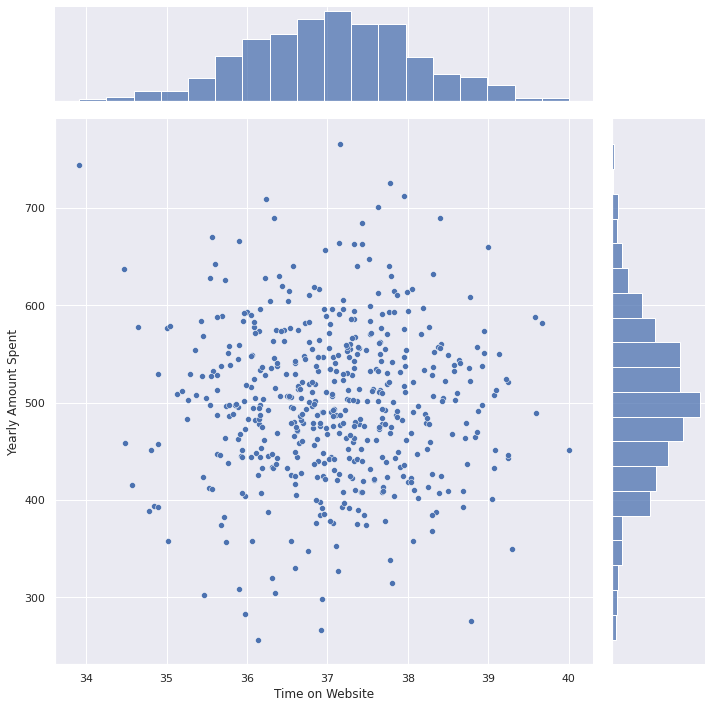

In [47]:
sns.jointplot(data=customers, x='Time on Website', y='Yearly Amount Spent', height=10)
plt.show()

** Do the same but with the Time on App column instead. **

In [48]:
correlationApp = round(customers['Time on App'].corr(customers['Yearly Amount Spent']), 3)
correlationApp

0.499

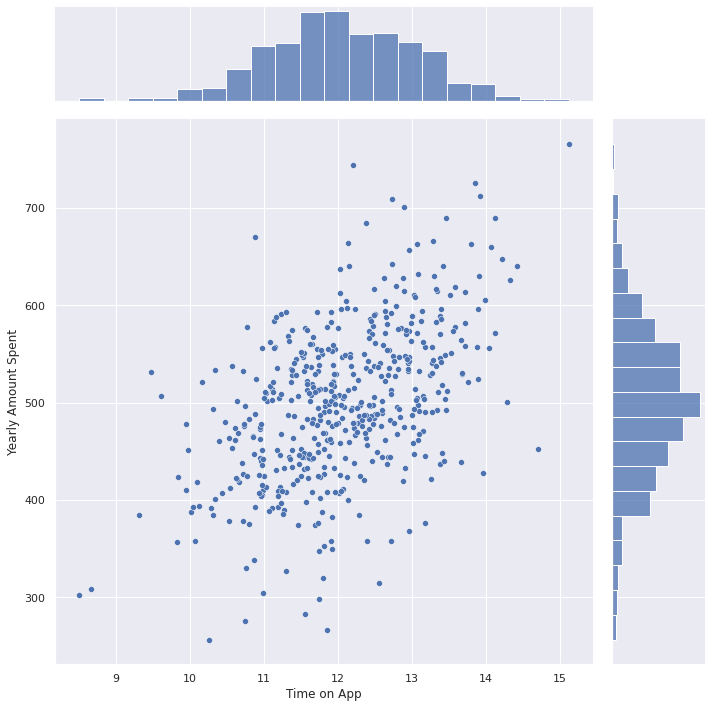

In [49]:
sns.jointplot(data=customers, x='Time on App', y='Yearly Amount Spent', height=10)
plt.show()

** Use jointplot to create a 2D hex bin plot comparing Time on App and Length of Membership.**

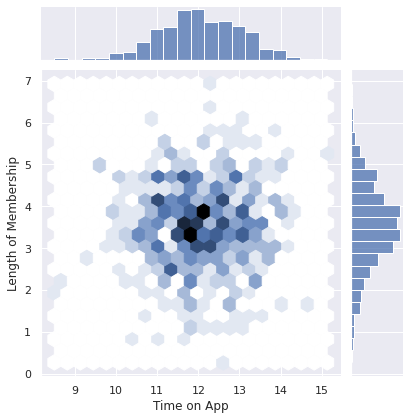

In [51]:
sns.jointplot(data=customers, x='Time on App', y='Length of Membership', kind="hex")
plt.show()

**Let's explore these types of relationships across the entire data set. Use [pairplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/axis_grids.html#plotting-pairwise-relationships-with-pairgrid-and-pairplot) to recreate the plot below.(Don't worry about the the colors)**

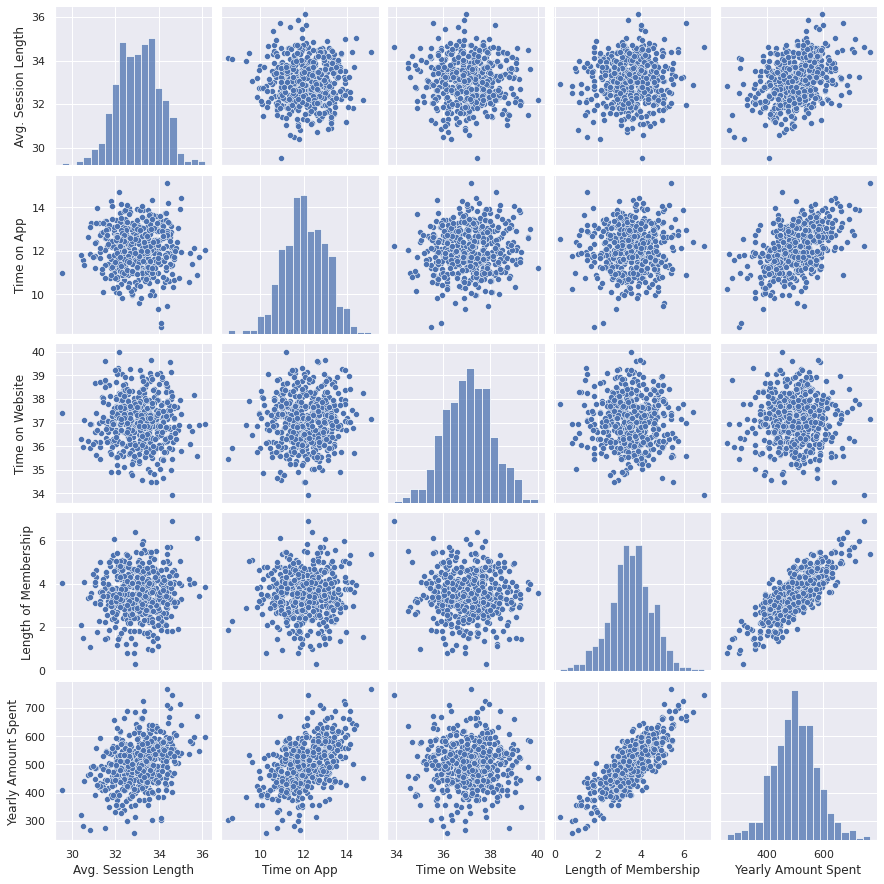

CPU times: user 11 s, sys: 202 ms, total: 11.2 s
Wall time: 11 s


In [52]:
%%time 

sns.pairplot(customers)
plt.show()

**Based off this plot what looks to be the most correlated feature with Yearly Amount Spent?**

In [62]:
duplicates = np.zeros_like(customers.corr())
triangleIndices = np.triu_indices_from(duplicates)
duplicates[triangleIndices] = 1
duplicates

array([[1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1.],
       [0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 1.]])

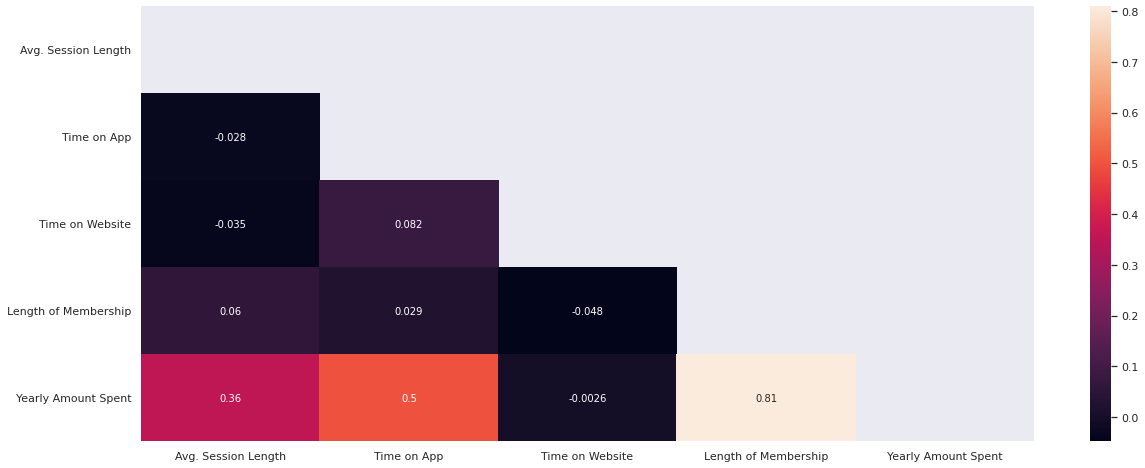

CPU times: user 364 ms, sys: 106 ms, total: 470 ms
Wall time: 378 ms


In [67]:
%%time

plt.figure(figsize=(20, 8))
sns.heatmap(customers.corr(), mask=duplicates, annot=True)
plt.show()

### Answer 

Based on the above data it can be drawn that Yearly Amount spent is most correlated with the length of membership.

**Create a linear model plot (using seaborn's lmplot) of  Yearly Amount Spent vs. Length of Membership. **

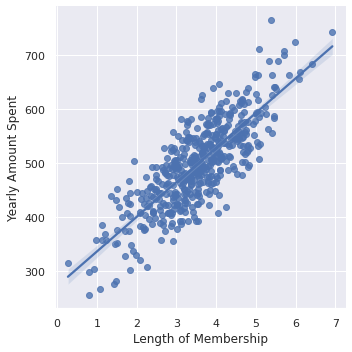

In [66]:
sns.lmplot(data=customers, x='Length of Membership', y='Yearly Amount Spent')
plt.show()

## Training and Testing Data

Now that we've explored the data a bit, let's go ahead and split the data into training and testing sets.
** Set a variable X equal to the numerical features of the customers and a variable y equal to the "Yearly Amount Spent" column. **

In [73]:
x = DataFrame(customers, columns = ['Avg. Session Length', 'Time on App', 'Time on Website', 'Length of Membership'])
x

,Avg. Session Length,Time on App,Time on Website,Length of Membership
0,34.497268,12.655651,39.577668,4.082621
1,31.926272,11.109461,37.268959,2.664034
2,33.000915,11.330278,37.110597,4.104543
3,34.305557,13.717514,36.721283,3.120179
4,33.330673,12.795189,37.536653,4.446308
...,...,...,...,...
495,33.237660,13.566160,36.417985,3.746573
496,34.702529,11.695736,37.190268,3.576526
497,32.646777,11.499409,38.332576,4.958264
498,33.322501,12.391423,36.840086,2.336485


In [74]:
y = DataFrame(customers, columns = ['Yearly Amount Spent'])
y

,Yearly Amount Spent
0,587.951054
1,392.204933
2,487.547505
3,581.852344
4,599.406092
...,...
495,573.847438
496,529.049004
497,551.620145
498,456.469510


** Use model_selection.train_test_split from sklearn to split the data into training and testing sets. Set test_size=0.3 and random_state=101**

In [77]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.3, random_state=101)

In [79]:
xTrain

,Avg. Session Length,Time on App,Time on Website,Length of Membership
202,31.525752,11.340036,37.039514,3.811248
428,31.862741,14.039867,37.022269,3.738225
392,33.258238,11.514949,37.128039,4.662845
86,33.877779,12.517666,37.151921,2.669942
443,33.025020,12.504220,37.645839,4.051382
...,...,...,...,...
63,32.789773,11.670066,37.408748,3.414688
326,33.217188,10.999684,38.442767,4.243813
337,31.827979,12.461147,37.428997,2.974737
11,33.879361,11.584783,37.087926,3.713209


In [80]:
xTest

,Avg. Session Length,Time on App,Time on Website,Length of Membership
18,32.187812,14.715388,38.244115,1.516576
361,32.077590,10.347877,39.045156,3.434560
104,31.389585,10.994224,38.074452,3.428860
4,33.330673,12.795189,37.536653,4.446308
156,32.294642,12.443048,37.327848,5.084861
...,...,...,...,...
147,32.255901,10.480507,37.338670,4.514122
346,32.765665,12.506548,35.823467,3.126509
423,33.128693,10.398458,36.683393,3.859818
17,32.338899,12.013195,38.385137,2.420806


In [81]:
yTrain

,Yearly Amount Spent
202,443.965627
428,556.298141
392,549.131573
86,487.379306
443,561.516532
...,...
63,483.159721
326,505.230068
337,440.002748
11,522.337405


In [82]:
yTest

,Yearly Amount Spent
18,452.315675
361,401.033135
104,410.069611
4,599.406092
156,586.155870
...,...
147,479.731938
346,488.387526
423,461.112248
17,407.704548


## Training the Model

Now its time to train our model on our training data!

** Import LinearRegression from sklearn.linear_model **

In [84]:
##Imported the LinearRegression in the imports section

**Create an instance of a LinearRegression() model named lm.**

In [86]:
lm = LinearRegression()

** Train/fit lm on the training data.**

In [109]:
results = lm.fit(xTrain, yTrain)

**Print out the coefficients of the model**

In [113]:
print('The coefficients of the above Linear Regression are as follows:\n', lm.coef_)

The coefficients of the above Linear Regression are as follows:
 [[25.98154972 38.59015875  0.19040528 61.27909654]]


In [114]:
print('The Intercept of the above Linear Regression are as follows:\n', lm.intercept_)

The Intercept of the above Linear Regression are as follows:
 [-1047.93278225]


## Predicting Test Data
Now that we have fit our model, let's evaluate its performance by predicting off the test values!

** Use lm.predict() to predict off the X_test set of the data.**

In [138]:
predictedVals = lm.predict(xTest)
predictedFinal = np.reshape(predictedVals, [150])
predictedFinal

array([456.44186104, 402.72005312, 409.2531539 , 591.4310343 ,
       590.01437275, 548.82396607, 577.59737969, 715.44428115,
       473.7893446 , 545.9211364 , 337.8580314 , 500.38506697,
       552.93478041, 409.6038964 , 765.52590754, 545.83973731,
       693.25969124, 507.32416226, 573.10533175, 573.2076631 ,
       397.44989709, 555.0985107 , 458.19868141, 482.66899911,
       559.2655959 , 413.00946082, 532.25727408, 377.65464817,
       535.0209653 , 447.80070905, 595.54339577, 667.14347072,
       511.96042791, 573.30433971, 505.02260887, 565.30254655,
       460.38785393, 449.74727868, 422.87193429, 456.55615271,
       598.10493696, 449.64517443, 615.34948995, 511.88078685,
       504.37568058, 515.95249276, 568.64597718, 551.61444684,
       356.5552241 , 464.9759817 , 481.66007708, 534.2220025 ,
       256.28674001, 505.30810714, 520.01844434, 315.0298707 ,
       501.98080155, 387.03842642, 472.97419543, 432.8704675 ,
       539.79082198, 590.03070739, 752.86997652, 558.27

** Create a scatterplot of the real test values versus the predicted values. **

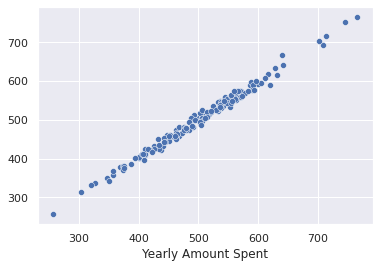

In [142]:
sns.scatterplot(x=yTest['Yearly Amount Spent'], y=predictedFinal)
plt.show()

## Evaluating the Model

Let's evaluate our model performance by calculating the residual sum of squares and the explained variance score (R^2).

** Calculate the Mean Absolute Error, Mean Squared Error, and the Root Mean Squared Error. Refer to the lecture or to Wikipedia for the formulas**

MAE: 7.22814865343
MSE: 79.813051651
RMSE: 8.93381506698


## Residuals

You should have gotten a very good model with a good fit. Let's quickly explore the residuals to make sure everything was okay with our data. 

**Plot a histogram of the residuals and make sure it looks normally distributed. Use either seaborn distplot, or just plt.hist().**

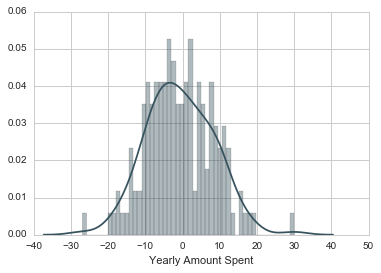

## Conclusion
We still want to figure out the answer to the original question, do we focus our efforts on mobile app or website development? Or maybe that doesn't even really matter, and Membership Time is what is really important.  Let's see if we can interpret the coefficients at all to get an idea.

** Recreate the dataframe below. **

,Coeffecient
Avg. Session Length,25.981550
Time on App,38.590159
Time on Website,0.190405
Length of Membership,61.279097


** How can you interpret these coefficients? **

*Answer here*

**Do you think the company should focus more on their mobile app or on their website?**

*Answer here*

## Great Job!

Congrats on your contract work! The company loved the insights! Let's move on.